1. Análisis de datos

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


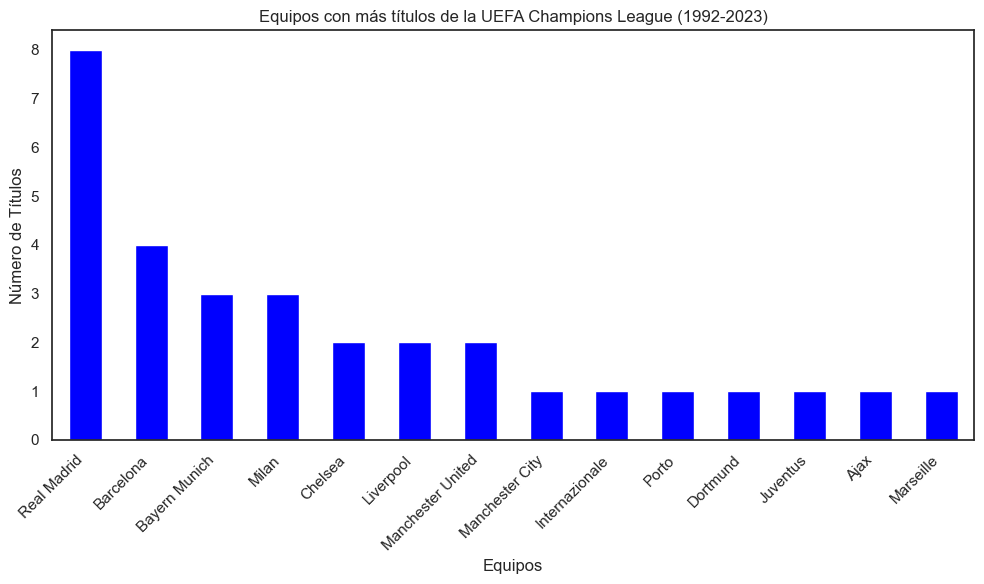

In [76]:
df_general = pd.read_csv('CSV/champions_league.csv')

# Contar el número de veces que cada equipo ha ganado la UEFA Champions League
campeones = df_general['campeon'].value_counts()

# Graficar los mejores equipos
plt.figure(figsize=(10, 6))
campeones.plot(kind='bar', color='blue')
plt.title('Equipos con más títulos de la UEFA Champions League (1992-2023)')
plt.xlabel('Equipos')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [77]:
df_temporadas = pd.read_csv('CSV/temporadas.csv')

df_temporadas.head()

,SEASON,HOME_TEAM,AWAY_TEAM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE
0,2016-2017,FC Basel,PFC Ludogorets Razgrad,1,1
1,2016-2017,Paris Saint-Germain,Arsenal FC,1,1
2,2016-2017,Arsenal FC,FC Basel,2,0
3,2016-2017,PFC Ludogorets Razgrad,Paris Saint-Germain,1,3
4,2016-2017,Arsenal FC,PFC Ludogorets Razgrad,6,0


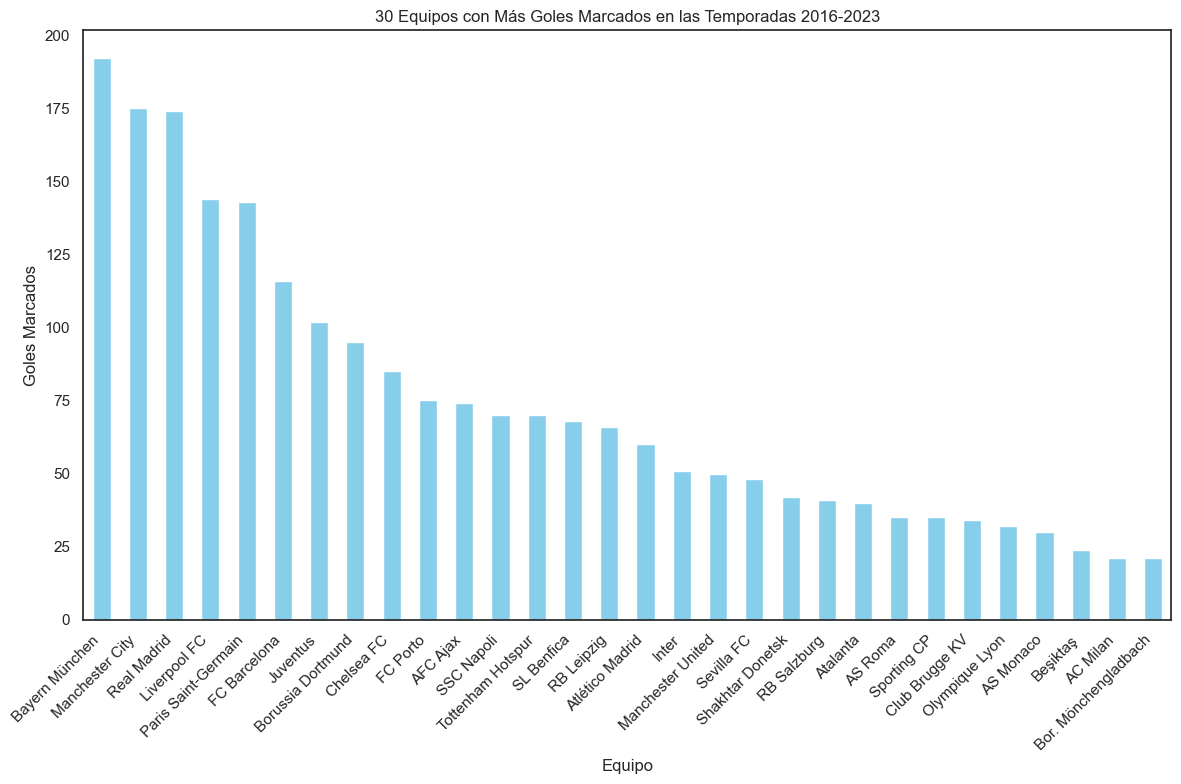

In [78]:
# Calcular la cantidad total de goles marcados por cada equipo
goles_por_equipo = df_temporadas.groupby('HOME_TEAM')['HOME_TEAM_SCORE'].sum() + df_temporadas.groupby('AWAY_TEAM')['AWAY_TEAM_SCORE'].sum()
# Seleccionar los 20 equipos con más goles marcados
top_30_equipos = goles_por_equipo.nlargest(30)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear la gráfica de barras
top_30_equipos.plot(kind='bar', ax=ax, color='skyblue')

# Añadir etiquetas y título
ax.set_xlabel('Equipo')
ax.set_ylabel('Goles Marcados')
ax.set_title('30 Equipos con Más Goles Marcados en las Temporadas 2016-2023')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Ranking de equipos con más puntos ganados:
Bayern München         165.0
Real Madrid            159.0
Manchester City        158.0
Liverpool FC           129.0
Juventus               120.0
Paris Saint-Germain    116.0
FC Barcelona           115.0
Chelsea FC              91.0
Atlético Madrid         86.0
Borussia Dortmund       83.0
FC Porto                78.0
Tottenham Hotspur       66.0
AFC Ajax                64.0
SSC Napoli              61.0
SL Benfica              59.0
RB Leipzig              59.0
Inter                   58.0
Sevilla FC              53.0
Manchester United       50.0
Shakhtar Donetsk        43.0
dtype: float64


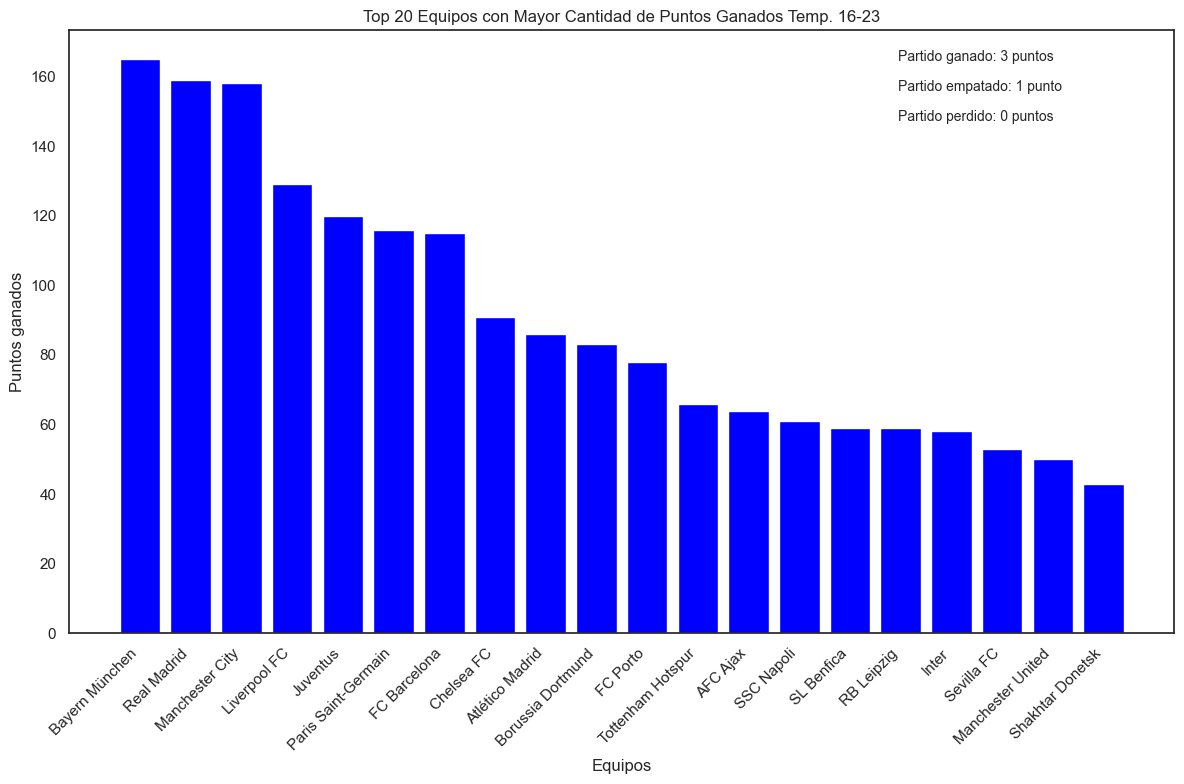

In [79]:
# Calcular el número total de partidos jugados por cada equipo
total_partidos_por_equipo = df_temporadas['HOME_TEAM'].value_counts() + df_temporadas['AWAY_TEAM'].value_counts()
# Calcular el número total de victorias, empates y derrotas por equipo
victorias_por_equipo = df_temporadas[df_temporadas['HOME_TEAM_SCORE'] > df_temporadas['AWAY_TEAM_SCORE']]['HOME_TEAM'].value_counts()
victorias_por_equipo += df_temporadas[df_temporadas['HOME_TEAM_SCORE'] < df_temporadas['AWAY_TEAM_SCORE']]['AWAY_TEAM'].value_counts()

derrotas_por_equipo = df_temporadas[df_temporadas['HOME_TEAM_SCORE'] < df_temporadas['AWAY_TEAM_SCORE']]['HOME_TEAM'].value_counts()
derrotas_por_equipo += df_temporadas[df_temporadas['HOME_TEAM_SCORE'] > df_temporadas['AWAY_TEAM_SCORE']]['AWAY_TEAM'].value_counts()

# Calcular el número de empates por equipo
total_empates_por_equipo = total_partidos_por_equipo - (victorias_por_equipo + derrotas_por_equipo)

# Calcular los puntos ganados por cada equipo
puntos_por_victoria = 3
puntos_por_empate = 1
puntos_por_derrota = 0

puntos_por_equipo = (victorias_por_equipo * puntos_por_victoria) + (total_empates_por_equipo * puntos_por_empate)

# Ordenar los equipos por la cantidad de puntos ganados
puntos_por_equipo = puntos_por_equipo.sort_values(ascending=False)

# Mostrar los 20 equipos con más puntos ganados
print("Ranking de equipos con más puntos ganados:")
print(puntos_por_equipo.head(20))

# Graficar los puntos ganados por los 20 primeros equipos
plt.figure(figsize=(12, 8))

# Gráfico de barras para puntos ganados
plt.bar(puntos_por_equipo.index[:20], puntos_por_equipo.values[:20], color='blue')
plt.xlabel('Equipos')
plt.ylabel('Puntos ganados')
plt.title('Top 20 Equipos con Mayor Cantidad de Puntos Ganados Temp. 16-23')

# Agregar leyenda
plt.text(0.75, 0.95, 'Partido ganado: 3 puntos', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.75, 0.9, 'Partido empatado: 1 punto', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.75, 0.85, 'Partido perdido: 0 puntos', fontsize=10, transform=plt.gca().transAxes)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ranking de equipos con más victorias:
Bayern München         73.239437
Manchester City        64.000000
Real Madrid            62.025316
Liverpool FC           61.538462
Juventus               58.730159
FC Barcelona           55.737705
Paris Saint-Germain    55.555556
Chelsea FC             55.102041
AS Roma                50.000000
Arsenal FC             50.000000
Leicester City         50.000000
AFC Ajax               50.000000
RB Leipzig             47.368421
Manchester United      46.875000
FC Porto               46.000000
Atlético Madrid        45.283019
SSC Napoli             44.736842
Tottenham Hotspur      44.186047
Borussia Dortmund      42.857143
Villarreal CF          41.666667
dtype: float64

Derrotas de los equipos con más victorias:
Bayern München         14.084507
Manchester City        17.333333
Real Madrid            22.784810
Liverpool FC           24.615385
Juventus               26.984127
FC Barcelona           22.950820
Paris Saint-Germain    26.984127
Chelsea FC  

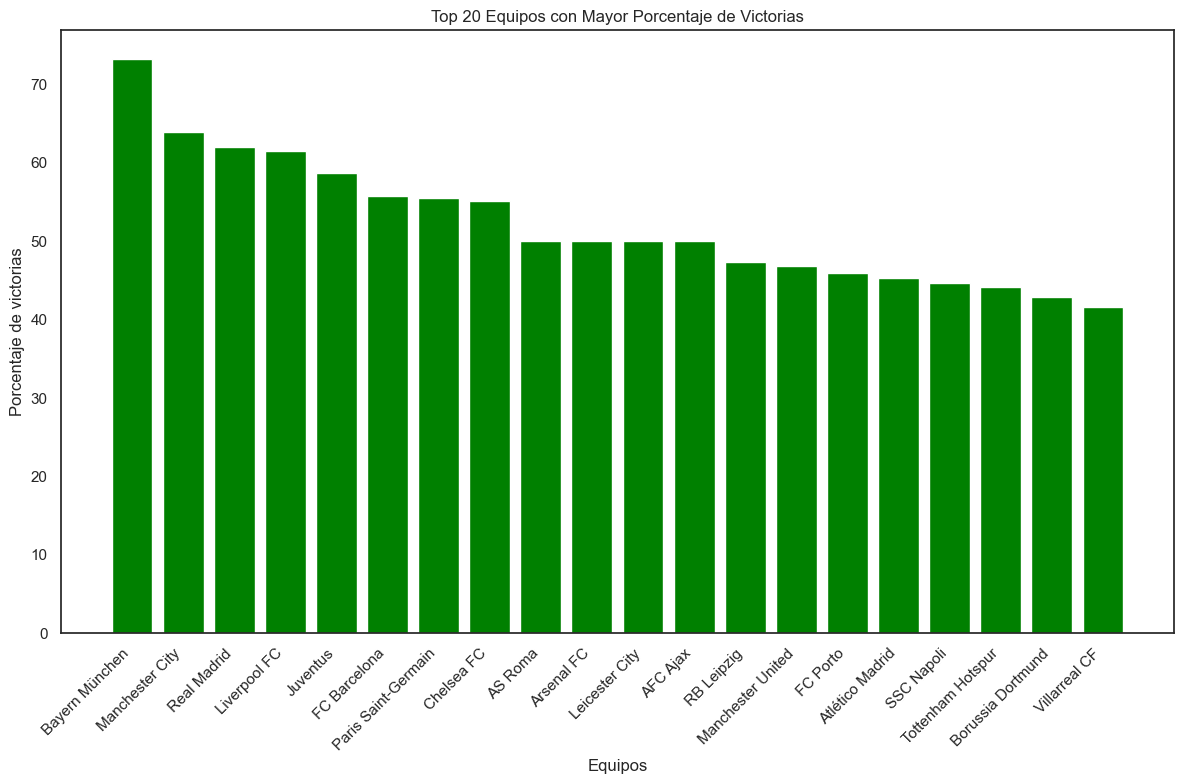

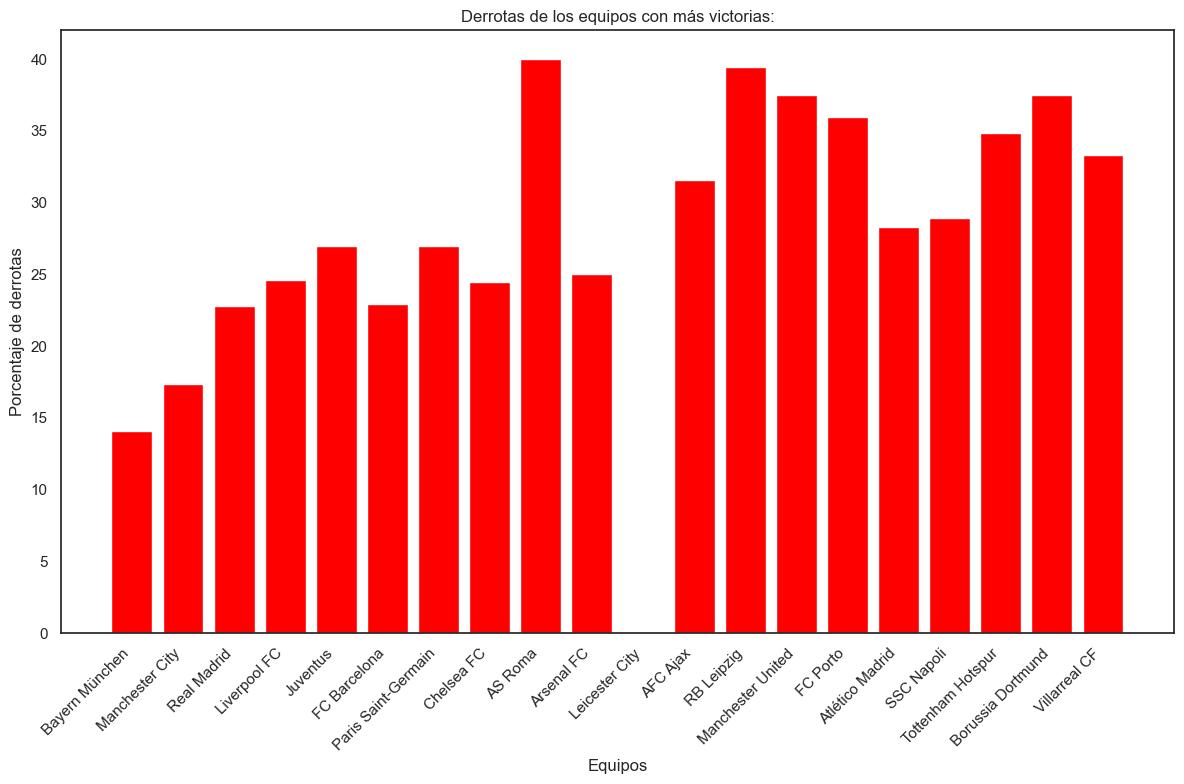

In [80]:
# Calcular el número total de partidos jugados por cada equipo
total_partidos_por_equipo = df_temporadas['HOME_TEAM'].value_counts() + df_temporadas['AWAY_TEAM'].value_counts()

# Calcular el número total de victorias y derrotas por equipo
victorias_por_equipo = df_temporadas[df_temporadas['HOME_TEAM_SCORE'] > df_temporadas['AWAY_TEAM_SCORE']]['HOME_TEAM'].value_counts()
victorias_por_equipo += df_temporadas[df_temporadas['HOME_TEAM_SCORE'] < df_temporadas['AWAY_TEAM_SCORE']]['AWAY_TEAM'].value_counts()

derrotas_por_equipo = df_temporadas[df_temporadas['HOME_TEAM_SCORE'] < df_temporadas['AWAY_TEAM_SCORE']]['HOME_TEAM'].value_counts()
derrotas_por_equipo += df_temporadas[df_temporadas['HOME_TEAM_SCORE'] > df_temporadas['AWAY_TEAM_SCORE']]['AWAY_TEAM'].value_counts()

# Calcular el porcentaje de victorias y derrotas por equipo
porcentaje_victorias = (victorias_por_equipo / total_partidos_por_equipo) * 100
porcentaje_derrotas = (derrotas_por_equipo / total_partidos_por_equipo) * 100

# Ordenar los equipos por el porcentaje de victorias
porcentaje_victorias = porcentaje_victorias.sort_values(ascending=False)
porcentaje_derrotas = porcentaje_derrotas.loc[porcentaje_victorias.index]

# Mostrar los 20 equipos con más victorias y sus porcentajes
print("Ranking de equipos con más victorias:")
print(porcentaje_victorias.head(20))

# Mostrar los 20 equipos con más derrotas y sus porcentajes
print("\nDerrotas de los equipos con más victorias:")
print(porcentaje_derrotas.head(20))

# Graficar los porcentajes de victorias de los 20 primeros equipos
plt.figure(figsize=(12, 8))

# Gráfico de barras para porcentaje de victorias
plt.bar(porcentaje_victorias.index[:20], porcentaje_victorias.values[:20], color='green')
plt.xlabel('Equipos')
plt.ylabel('Porcentaje de victorias')
plt.title('Top 20 Equipos con Mayor Porcentaje de Victorias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graficar los porcentajes de derrotas de los 20 primeros equipos
plt.figure(figsize=(12, 8))

# Gráfico de barras para porcentaje de derrotas
plt.bar(porcentaje_derrotas.index[:20], porcentaje_derrotas.values[:20], color='red')
plt.xlabel('Equipos')
plt.ylabel('Porcentaje de derrotas')
plt.title('Derrotas de los equipos con más victorias:')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [81]:
serie = df_temporadas['HOME_TEAM_SCORE']

# Mostrar la serie resultante
print(serie)
print(type(serie))

0      1
1      1
2      2
3      1
4      6
      ..
864    2
865    1
866    0
867    1
868    3
Name: HOME_TEAM_SCORE, Length: 869, dtype: int64
<class 'pandas.core.series.Series'>


In [82]:
# Acceder a los valores de la serie
print(serie.values)

# Verificar el tipo de datos de los valores
print(type(serie.values))

# Acceder a los índices de la serie
print(serie.index)

# Verificar el tipo de datos de los índices
print(type(serie.index))

# Consultar el número de elementos de la serie
print(serie.size)

# Consultar el tipo de datos de los elementos de la serie
print(serie.dtype)


[1 1 2 1 6 3 1 2 2 0 1 2 1 1 1 4 0 2 1 1 3 0 6 1 7 4 1 3 0 4 1 3 1 0 4 1 5
 0 1 2 4 0 2 1 3 2 1 0 2 1 1 0 0 1 3 0 1 2 3 3 0 2 2 2 5 1 1 3 8 1 1 2 0 1
 4 1 1 1 0 1 0 2 0 5 0 3 0 1 0 0 1 4 0 1 2 0 1 4 3 5 5 2 0 2 1 1 4 6 1 2 3
 0 3 2 1 1 1 4 0 3 3 0 2 2 1 3 1 5 1 0 0 2 1 2 1 0 2 3 0 3 0 0 3 5 1 1 7 3
 0 0 6 1 1 0 3 3 1 0 2 1 1 3 2 2 0 3 2 0 1 0 3 2 0 2 1 1 3 5 0 2 3 1 3 7 1
 2 0 2 3 2 1 2 3 3 1 2 2 1 1 0 2 1 3 1 3 1 1 5 1 3 3 1 0 1 1 3 1 1 0 3 3 2
 0 0 3 1 5 0 2 0 1 1 1 1 1 1 3 1 0 4 3 3 1 0 1 5 1 2 4 3 1 0 3 3 1 4 0 2 2
 0 0 0 4 2 2 1 2 2 2 1 1 1 1 1 3 0 6 1 2 4 2 1 2 3 1 1 1 3 0 1 1 0 4 2 2 3
 1 2 3 0 1 2 0 1 1 2 0 5 3 1 2 1 1 2 0 3 6 2 2 2 1 2 3 2 1 5 3 2 1 0 1 0 0
 2 0 0 3 0 1 0 3 1 1 1 2 2 0 2 3 1 0 0 2 2 0 1 1 3 7 3 5 1 2 1 1 0 1 3 1 4
 0 3 4 2 0 0 3 2 0 0 0 1 6 1 2 5 1 2 3 2 3 5 2 2 0 4 0 3 1 0 4 1 2 2 5 3 1
 1 2 0 1 2 1 3 0 1 2 1 2 0 1 2 0 2 6 0 4 2 1 2 1 1 1 4 0 1 0 0 2 2 1 0 3 3
 1 2 1 1 1 3 0 2 2 0 3 2 2 3 2 0 3 0 1 0 1 4 4 2 0 2 0 2 1 4 0 0 1 1 1 3 3
 2 2 2 2 4 3 1 2 2 1 0 0 

In [83]:
# Contar el número de veces que cada equipo ha ganado la Champions
ganadores_counts = df_general['campeon'].value_counts().to_dict()

# Contar el número de veces que cada equipo ha sido subcampeón de la Champions
subcampeones_counts = df_general['subcampeon'].value_counts().to_dict()

# Mostrar los resultados
print("Ganadores de la Champions desde 1992:")
for equipo, num_veces in ganadores_counts.items():
    print(f"{equipo}: {num_veces} ")

print("\nSubcampeones de la Champions desde 1992:")
for equipo, num_veces in subcampeones_counts.items():
    print(f"{equipo}: {num_veces} ")

Ganadores de la Champions desde 1992:
Real Madrid: 8 
Barcelona: 4 
Bayern Munich: 3 
Milan: 3 
Chelsea: 2 
Liverpool: 2 
Manchester United: 2 
Manchester City: 1 
Internazionale: 1 
Porto: 1 
Dortmund: 1 
Juventus: 1 
Ajax: 1 
Marseille: 1 

Subcampeones de la Champions desde 1992:
Juventus: 5 
Bayern Munich: 3 
Liverpool: 3 
Milan: 3 
Manchester United: 2 
Valencia: 2 
Atlético Madrid: 2 
Arsenal: 1 
Ajax: 1 
Bayer Leverkusen: 1 
Monaco: 1 
Internazionale: 1 
Chelsea: 1 
Dortmund: 1 
Tottenham Hotspur: 1 
Paris Saint-Germain: 1 
Manchester City: 1 
Barcelona: 1 


In [84]:
df_23_24 = pd.read_csv('CSV/datos_temp23_24.csv')
df_23_24

,rango,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,diferencia_de_goles,puntos
0,1,de Bayern Munich,6,5,1,0,12,6,6,16
1,2,dk FC Copenhagen,6,2,2,2,8,8,0,8
2,3,tr Galatasaray,6,1,2,3,10,13,-3,5
3,4,eng Manchester Utd,6,1,1,4,12,15,-3,4
4,1,eng Arsenal,6,4,1,1,16,4,12,13
5,2,nl PSV Eindhoven,6,2,3,1,8,10,-2,9
6,3,fr Lens,6,2,2,2,6,11,-5,8
7,4,es Sevilla,6,0,2,4,7,12,-5,2
8,1,es Real Madrid,6,6,0,0,16,7,9,18
9,2,it Napoli,6,3,1,2,10,9,1,10


In [85]:
df_8 = df_23_24[df_23_24['rango'] == 'R16']

df_otro = df_23_24[df_23_24['rango'] != 'R16']

df_8.to_csv('CSV/octavos_23_24.csv', index=False)
df_otro.to_csv('CSV/grupos_23_24.csv', index=False)

In [90]:
equivalencias = {
    'Manchester City': ['eng Manchester City', 'Manchester City', 'Manchester City FC'],
    'Real Madrid': ['es Real Madrid', 'Real Madrid', 'Real Madrid FC'],
    'Bayern Munich': ['de Bayern Munich', 'Bayern München', 'Bayern Munich'],
    'Porto': ['pt Porto', 'FC Porto', 'Porto'],
    'Inter': ['it Inter', 'Inter', 'Internazionale'],
    'Atlético Madrid': ['es Atlético Madrid', 'Atlético Madrid', 'Atlético Madrid'],
    'Arsenal': ['eng Arsenal', 'Arsenal FC', 'Arsenal'],
    'Barcelona': ['es Barcelona', 'FC Barcelona', 'Barcelona'],
    'Lazio': ['it Lazio', 'Lazio Roma', 'Società Sportiva Lazio'],
    'Dortmund': ['de Dortmund', 'Borussia Dortmund', 'Dortmund'],
    'Real Sociedad': ['es Real Sociedad', 'Real Sociedad de Futbol', 'Real Sociedad'],
    'RB Leipzig': ['de RB Leipzig', 'RB Leipzig', 'Leipzig'],
    'Paris Saint-Germain': ['fr Paris S-G', 'Paris Saint-Germain', 'Paris Saint-Germain'],
    'Napoli': ['it Napoli', 'SSC Napoli', 'Napoli'],
    'PSV Eindhoven': ['nl PSV Eindhoven', 'PSV Eindhoven', 'Eindhoven'],
    'FC Copenhagen': ['dk FC Copenhagen', 'FC København', 'Copenhagen']
}



In [91]:
# Función para convertir los nombres de los equipos a un formato estándar
def convertir_nombres(equipo):
    for key, values in equivalencias.items():
        if equipo in values:
            return key
    return equipo

# Aplicar la función a los DataFrames
df_general['campeon'] = df_general['campeon'].apply(convertir_nombres)
df_general['subcampeon'] = df_general['subcampeon'].apply(convertir_nombres)
df_temporadas['HOME_TEAM'] = df_temporadas['HOME_TEAM'].apply(convertir_nombres)
df_temporadas['AWAY_TEAM'] = df_temporadas['AWAY_TEAM'].apply(convertir_nombres)
df_8['equipo'] = df_8['equipo'].apply(convertir_nombres)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_33868\3558799350.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['equipo'] = df_8['equipo'].apply(convertir_nombres)


In [94]:
df_general

,temporada,competicion,nun_equipos,campeon,subcampeon
0,2022-2023,UEFA Champions League,78,Manchester City,Inter
1,2021-2022,UEFA Champions League,80,Real Madrid,Liverpool
2,2020-2021,UEFA Champions League,79,Chelsea,Manchester City
3,2019-2020,UEFA Champions League,79,Bayern Munich,Paris Saint-Germain
4,2018-2019,UEFA Champions League,79,Liverpool,Tottenham Hotspur
5,2017-2018,UEFA Champions League,79,Real Madrid,Liverpool
6,2016-2017,UEFA Champions League,78,Real Madrid,Juventus
7,2015-2016,UEFA Champions League,78,Real Madrid,Atlético Madrid
8,2014-2015,UEFA Champions League,77,Barcelona,Juventus
9,2013-2014,UEFA Champions League,76,Real Madrid,Atlético Madrid


In [95]:
df_temporadas

,SEASON,HOME_TEAM,AWAY_TEAM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE
0,2016-2017,FC Basel,PFC Ludogorets Razgrad,1,1
1,2016-2017,Paris Saint-Germain,Arsenal,1,1
2,2016-2017,Arsenal,FC Basel,2,0
3,2016-2017,PFC Ludogorets Razgrad,Paris Saint-Germain,1,3
4,2016-2017,Arsenal,PFC Ludogorets Razgrad,6,0
...,...,...,...,...,...
864,2022-2023,Paris Saint-Germain,Juventus,2,1
865,2022-2023,RB Salzburg,AC Milan,1,1
866,2022-2023,Celtic FC,Real Madrid,0,3
867,2022-2023,Dinamo Zagreb,Chelsea FC,1,0


In [96]:
df_8

,rango,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,diferencia_de_goles,puntos
32,R16,Manchester City,7,7,0,0,21,8,13,21
33,R16,Real Madrid,7,7,0,0,17,7,10,21
34,R16,Bayern Munich,7,5,1,1,12,7,5,16
35,R16,Porto,7,5,0,2,16,8,8,15
36,R16,Inter,7,4,3,0,9,5,4,15
37,R16,Atlético Madrid,7,4,2,1,17,7,10,14
38,R16,Arsenal,7,4,1,2,16,5,11,13
39,R16,Barcelona,7,4,1,2,13,7,6,13
40,R16,Lazio,7,4,1,2,8,7,1,13
41,R16,Dortmund,7,3,3,1,8,5,3,12


In [100]:
campeones = df_general['campeon'].value_counts()
goles = df_temporadas.groupby('HOME_TEAM')['HOME_TEAM_SCORE'].sum() + df_temporadas.groupby('AWAY_TEAM')['AWAY_TEAM_SCORE'].sum()
puntos = df_8.set_index('equipo')['puntos']



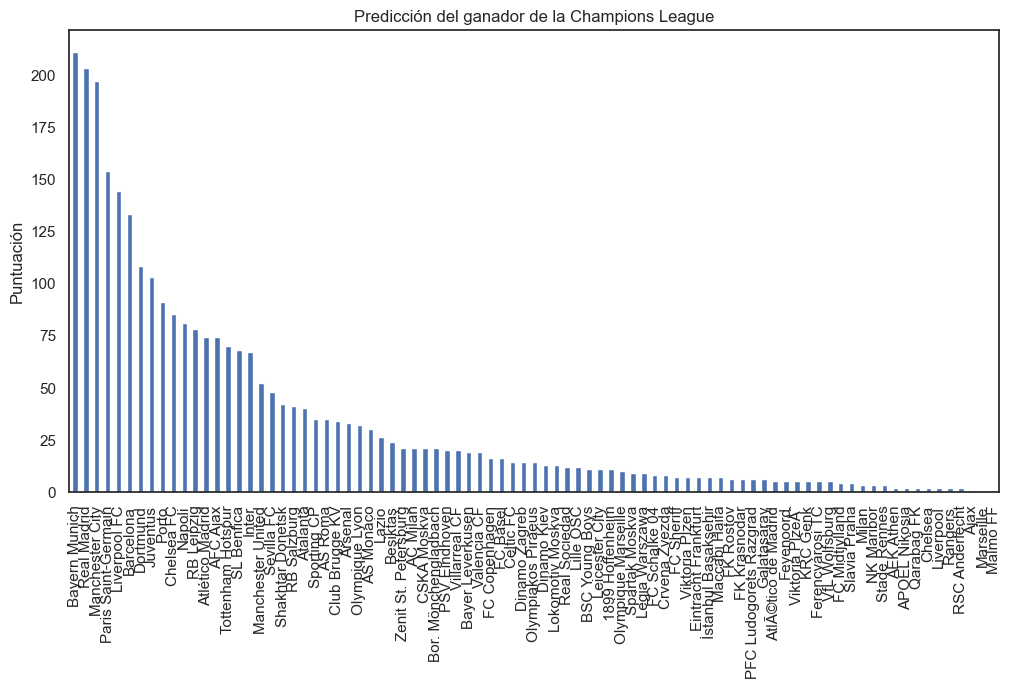

In [103]:
datos = pd.DataFrame({
    'campeonatos': campeones,
    'goles': goles,
    'puntos': puntos
})

datos = datos.fillna(0)

datos['puntuacion'] = datos['campeonatos'] + datos['goles'] + datos['puntos']

# Ordena los equipos por su puntuación
datos = datos.sort_values('puntuacion', ascending=False)

# Muestra un gráfico de barras con las puntuaciones de los equipos
datos['puntuacion'].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Puntuación')
plt.title('Predicción del ganador de la Champions League')
plt.show()

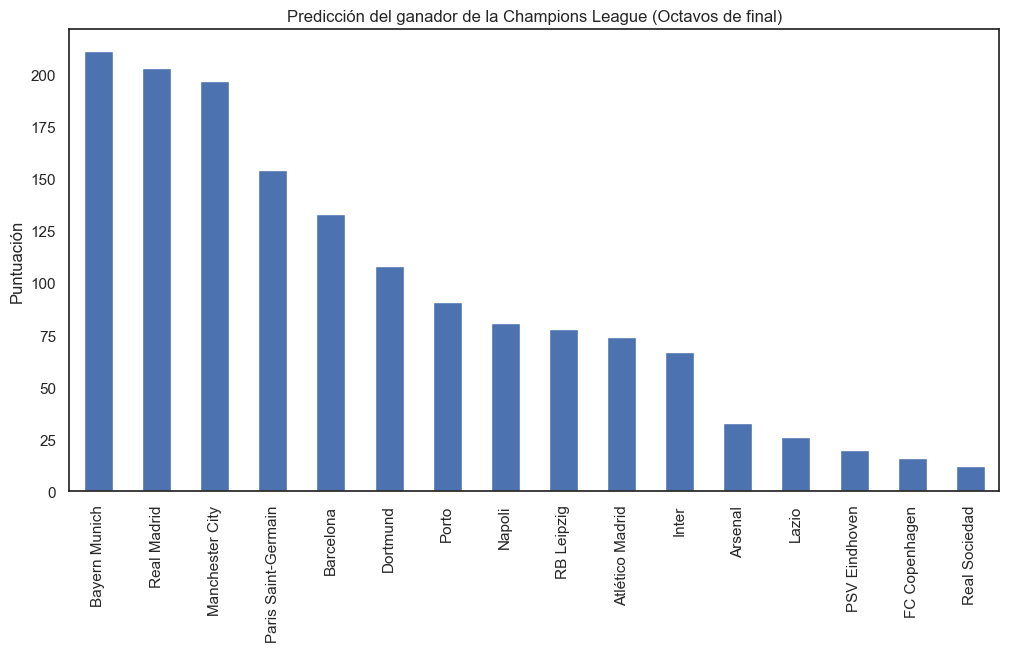

In [104]:
# Calcular la puntuación sumando campeonatos, goles y puntos
datos['puntuacion'] = datos['campeonatos'] + datos['goles'] + datos['puntos']

# Ordenar los equipos por su puntuación
datos = datos.sort_values('puntuacion', ascending=False)

# Definir los equipos que participan en los octavos de final
equipos_octavos = ['Manchester City', 'Real Madrid', 'Bayern Munich', 'Porto', 'Inter', 'Atlético Madrid', 'Arsenal', 'Barcelona', 'Lazio', 'Dortmund', 'Real Sociedad', 'RB Leipzig', 'Paris Saint-Germain', 'Napoli', 'PSV Eindhoven', 'FC Copenhagen']

# Filtrar los datos según los equipos que participan en los octavos de final
datos_octavos = datos[datos.index.isin(equipos_octavos)]

# Mostrar un gráfico de barras con las puntuaciones de los equipos en los octavos de final
datos_octavos['puntuacion'].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Puntuación')
plt.title('Predicción del ganador de la Champions League (Octavos de final)')
plt.show()


In [111]:
# Filtra los DataFrames para incluir solo las filas que pertenecen al Real Madrid
champions_league_rm = df_general[(df_general['campeon'] == 'Real Madrid') | (df_general['subcampeon'] == 'Real Madrid')]
temporadas_rm = df_temporadas[(df_temporadas['HOME_TEAM'] == 'Real Madrid') | (df_temporadas['AWAY_TEAM'] == 'Real Madrid')]
octavos_23_24_rm = df_8[df_8['equipo'] == 'Real Madrid']

df_rm = pd.concat([champions_league_rm, temporadas_rm, octavos_23_24_rm], ignore_index=True)

df_rm



,temporada,competicion,nun_equipos,campeon,subcampeon,SEASON,HOME_TEAM,AWAY_TEAM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,rango,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,diferencia_de_goles,puntos
0,2021-2022,UEFA Champions League,80.0,Real Madrid,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-2018,UEFA Champions League,79.0,Real Madrid,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-2017,UEFA Champions League,78.0,Real Madrid,Juventus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-2016,UEFA Champions League,78.0,Real Madrid,Atlético Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-2014,UEFA Champions League,76.0,Real Madrid,Atlético Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN,2022-2023,Shakhtar Donetsk,Real Madrid,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,2022-2023,Real Madrid,Shakhtar Donetsk,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,2022-2023,Real Madrid,RB Leipzig,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,2022-2023,Celtic FC,Real Madrid,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Primero, reemplaza los valores NaN en las columnas 'temporada' y 'SEASON' con cadenas vacías
df_rm['temporada'].fillna('', inplace=True)
df_rm['SEASON'].fillna('', inplace=True)

# Luego, crea una nueva columna que sea la combinación de 'temporada' y 'SEASON'
df_rm['temporada_total'] = df_rm['temporada'] + df_rm['SEASON']

# Ahora, puedes eliminar las columnas 'temporada' y 'SEASON' si ya no las necesitas
df_rm.drop(['temporada', 'SEASON'], axis=1, inplace=True)

df_rm

,competicion,nun_equipos,campeon,subcampeon,HOME_TEAM,AWAY_TEAM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,rango,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,diferencia_de_goles,puntos,temporada_total
0,UEFA Champions League,80.0,Real Madrid,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-2022
1,UEFA Champions League,79.0,Real Madrid,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018
2,UEFA Champions League,78.0,Real Madrid,Juventus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-2017
3,UEFA Champions League,78.0,Real Madrid,Atlético Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-2016
4,UEFA Champions League,76.0,Real Madrid,Atlético Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,Shakhtar Donetsk,Real Madrid,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
84,NaN,NaN,NaN,NaN,Real Madrid,Shakhtar Donetsk,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
85,NaN,NaN,NaN,NaN,Real Madrid,RB Leipzig,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
86,NaN,NaN,NaN,NaN,Celtic FC,Real Madrid,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023


In [113]:
df_rm = df_rm.drop(['competicion', 'nun_equipos', 'rango'], axis=1)

df_rm

,campeon,subcampeon,HOME_TEAM,AWAY_TEAM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,equipo,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,diferencia_de_goles,puntos,temporada_total
0,Real Madrid,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-2022
1,Real Madrid,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-2018
2,Real Madrid,Juventus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-2017
3,Real Madrid,Atlético Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-2016
4,Real Madrid,Atlético Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,NaN,Shakhtar Donetsk,Real Madrid,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
84,NaN,NaN,Real Madrid,Shakhtar Donetsk,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
85,NaN,NaN,Real Madrid,RB Leipzig,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
86,NaN,NaN,Celtic FC,Real Madrid,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-2023
